# PR-0019

### Problem Statement
FicZon Inc., a provider of on-premises and SaaS-based IT solutions, is facing a decline in sales performance due to increased market competition. Currently, the classification of lead quality is a manual, sales team-dependent process, primarily used for post-analysis rather than real-time decision-making.

The company aims to leverage Machine Learning to automate the classification of leads into High Potential and Low Potential categories. By doing so, FicZon expects to improve the efficiency of its sales operations and make more informed, timely decisions regarding lead engagement.

Our goal is: 
1.To perform data exploration to gain insights into factors influencing sales effectiveness.

2.To develop and train a machine learning model capable of predicting the lead category (High Potential or Low Potential).

In [5]:
# Importing numpy library for working with arrays
import numpy as np

# Importing pandas library for working with data sets
import pandas as pd

# Importing seaborn library for visualization
import seaborn as sns

# Importing matplotlib.pyplot for visualization
import matplotlib.pyplot as plt

# Importing warnings for disable warnings from the code
import warnings

# Importing mysql
import mysql.connector

# To ignore the warnings
warnings.filterwarnings('ignore')

# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Importing train_test_split
from sklearn.model_selection import train_test_split

# Importing metrics for evaluating the performance of Regression models
from sklearn.metrics import f1_score,classification_report

# Importing LogisticRegression model from sklearn
from sklearn.linear_model import LogisticRegression

# Importing KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Importing SVC model from sklearn
from sklearn.svm import SVC

# Importing DecisionTreeClassifier model from sklearn
from sklearn.tree import DecisionTreeClassifier

# Importing RandomForestClassifier model from sklearn
from sklearn.ensemble import RandomForestClassifier

# Importing MLPClassifier model from sklearn
from sklearn.neural_network import MLPClassifier

# Importing GridSearchCV for Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Importing RandomizedSearchCV for Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Importing SMOTE from imblearn
from imblearn.over_sampling import SMOTE

D:\newjurney\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### 2. LOADING DATA

</b>Insight</b>:

Considering data privacy, we should avoid including sensitive information such as the host, username, and password in the code. Instead, we can extract the required table from the SQL Server, save it as a CSV file, and then load the data using pandas

In [1]:
# Connecting to the database 
#connection=mysql.connector.Connect(host= '***********',
                        #user= '********',
                        #password= '***********',
                        #database='project_sales')

In [2]:
# Checking tables in the database
#db_tables=pd.read_sql_query('show tables',connection)
#print(db_tables)

In [3]:
# Loading the data from the table data
#query='select * from data'
#data=pd.read_sql(query,connection)
#data

In [81]:
# Loading the data using Pandas
data=pd.read_csv('data.csv')
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


### 3. CHECKING DUPLICATE ROWS

In [82]:
# Checking number of duplicate values
data.duplicated().sum()

2

In [83]:
# Visualizing the duplicate rows/entries in the data
data.loc[data.duplicated()]

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
130,10-11-2018 20:27,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
135,10-11-2018 20:17,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open


Insights
There are 2 rows which are repeating again(That is, duplicate rows). So we want to drop that rows permanently.

In [84]:
# Dropping/Removing the duplicate rows permanently 
data.drop_duplicates(inplace=True,ignore_index=True)

In [85]:
data[data.duplicated()]
# Now all the duplicates rows are removed succesfully

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status


### 4. BASIC CHECKS

In [86]:
# Visualize first 5 rows of the data
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [87]:
# Visualize last 5 rows of the data
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7415,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7416,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7417,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7418,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7419,28-04-2018 07:54,25.0,Website,NaN,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [88]:
# Checking the number of rows and number of columns of the data
data.shape

(7420, 9)

###### Insights
There are 7420 rows and 9 columns in the data

In [89]:
# Checking names of the columns in the data
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [90]:
# Checking index of the data
data.index

RangeIndex(start=0, stop=7420, step=1)

In [91]:
 # Checking for null values in the data
data.isnull().sum()

Created             0
Product_ID         56
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           56
Delivery_Mode       0
Status              0
dtype: int64

In [92]:
# Checking for the data types of each column.
data.dtypes

Created           object
Product_ID       float64
Source            object
Mobile            object
EMAIL             object
Sales_Agent       object
Location          object
Delivery_Mode     object
Status            object
dtype: object

###### Insights
Data type of all the columns are object

In [93]:
# Checking basic information about the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7420 entries, 0 to 7419
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7420 non-null   object 
 1   Product_ID     7364 non-null   float64
 2   Source         7403 non-null   object 
 3   Mobile         5610 non-null   object 
 4   EMAIL          7420 non-null   object 
 5   Sales_Agent    7397 non-null   object 
 6   Location       7364 non-null   object 
 7   Delivery_Mode  7420 non-null   object 
 8   Status         7420 non-null   object 
dtypes: float64(1), object(8)
memory usage: 521.8+ KB


In [94]:
# Checking basic statistical information for categorical columns
data.describe(include='O')

,Created,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7420,7403,5610,7420,7397,7364,7420,7420
unique,6752,25,486,883,12,17,5,11
top,26-09-2018 11:30,Call,XXXXXXX,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,2547,220,1699,1500,2500,2973,1536


In [95]:
# Checking value_counts for all the columns in the data
for i in data:
    print(data[i].value_counts())
    print('------------------------------------------')  

Created
26-09-2018 11:30    4
27-09-2018 11:00    4
10-05-2018 12:30    4
15-10-2018 10:36    4
14-09-2018 12:00    4
                   ..
29-08-2018 13:08    1
29-08-2018 15:26    1
29-08-2018 15:39    1
29-08-2018 15:54    1
28-04-2018 07:54    1
Name: count, Length: 6752, dtype: int64
------------------------------------------
Product_ID
18.0    1711
15.0    1518
19.0    1189
9.0      992
27.0     739
5.0      487
10.0     168
1.0      105
20.0     102
25.0      90
21.0      66
2.0       38
12.0      36
26.0      31
14.0      27
11.0      12
22.0       8
3.0        7
17.0       7
6.0        7
8.0        6
13.0       5
24.0       3
16.0       3
23.0       2
0.0        2
28.0       1
7.0        1
4.0        1
Name: count, dtype: int64
------------------------------------------
Source
Call                             2547
Live Chat-Direct                 1834
Website                          1592
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blo

In [96]:
# Checking unique values for all the columns in the data
for i in data:
    print(i)
    print(data[i].unique())
    print('------------------------------------------')

Created
['14-11-2018 10:05' '14-11-2018 09:22' '14-11-2018 09:21' ...
 '28-04-2018 09:20' '28-04-2018 08:04' '28-04-2018 07:54']
------------------------------------------
Product_ID
[nan  9. 19. 18. 15. 27.  5.  2.  3. 25. 10. 20. 11. 21.  1. 12. 13. 17.
 24. 26. 16. 23. 22.  8. 14.  6.  0. 28.  7.  4.]
------------------------------------------
Source
['Website' nan 'Live Chat-Google Organic' 'Call' 'Live Chat-Direct'
 'By Recommendation' 'Customer Referral' 'Live Chat-Blog' 'Live Chat -PPC'
 'Live Chat-Google Ads' 'Live Chat-Adwords Remarketing' 'E-Mail Message'
 'Existing Client' 'Live Chat-CPC' 'Existing Customer' 'Live Chat-Quora'
 'US Website' 'Just Dial' 'Campaign' 'Other' 'E-mail Campaign' 'CRM form'
 'SMS Campaign' 'Personal Contact' 'Live Chat-Youtube'
 'Live Chat-Justdial']
------------------------------------------
Mobile
['984XXXXXXX' 'XXXXXXX' '078XXXXXXX' '467XXXXXXX' '971XXXXXXX'
 '701XXXXXXX' '04.XXXXXXX' '805XXXXXXX' '+96XXXXXXX' '790XXXXXXX'
 '970XXXXXXX' '740XXXXXX

### 5. DOMAIN ANALYSIS

In [38]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

###### 1. Created : 
The column 'Created' is the date and time which the order created
###### 2. Product_ID : 
The column 'Product_ID' shows the Id of each product
###### 3. Source : 
By which means the order is placed/taken is shown in the column 'Source'
###### 4. Mobile : 
The column 'Mobile' shows the mobile number of the customer/client
###### 5. EMAIL : 
The column 'EMAIL' shows the email id of the customer/client
###### 6. Sales_Agent : 
The column 'Sales_Agent' show by whom the order taken
###### 7. Location : 
The Location of the customer/client is shown in the column 'Location'
###### 8. Delivery_Mode : 
By which mode the delivery was/will be delivered is shown in the column 'Delivery_Mode' 
###### 9. Status : 
The status of the order is shown in the column 'Status'

### 6. EXPLORATORY DATA ANALYSIS

### 6.1. Univariate Analysis

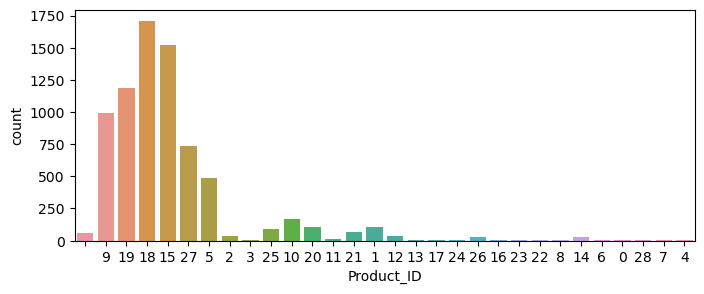

In [22]:
# Countplot for the column 'Product_ID'
plt.figure(figsize=(8,3))
sns.countplot(data,x='Product_ID')
plt.show()

###### Insights
The product 18 count higher than the others

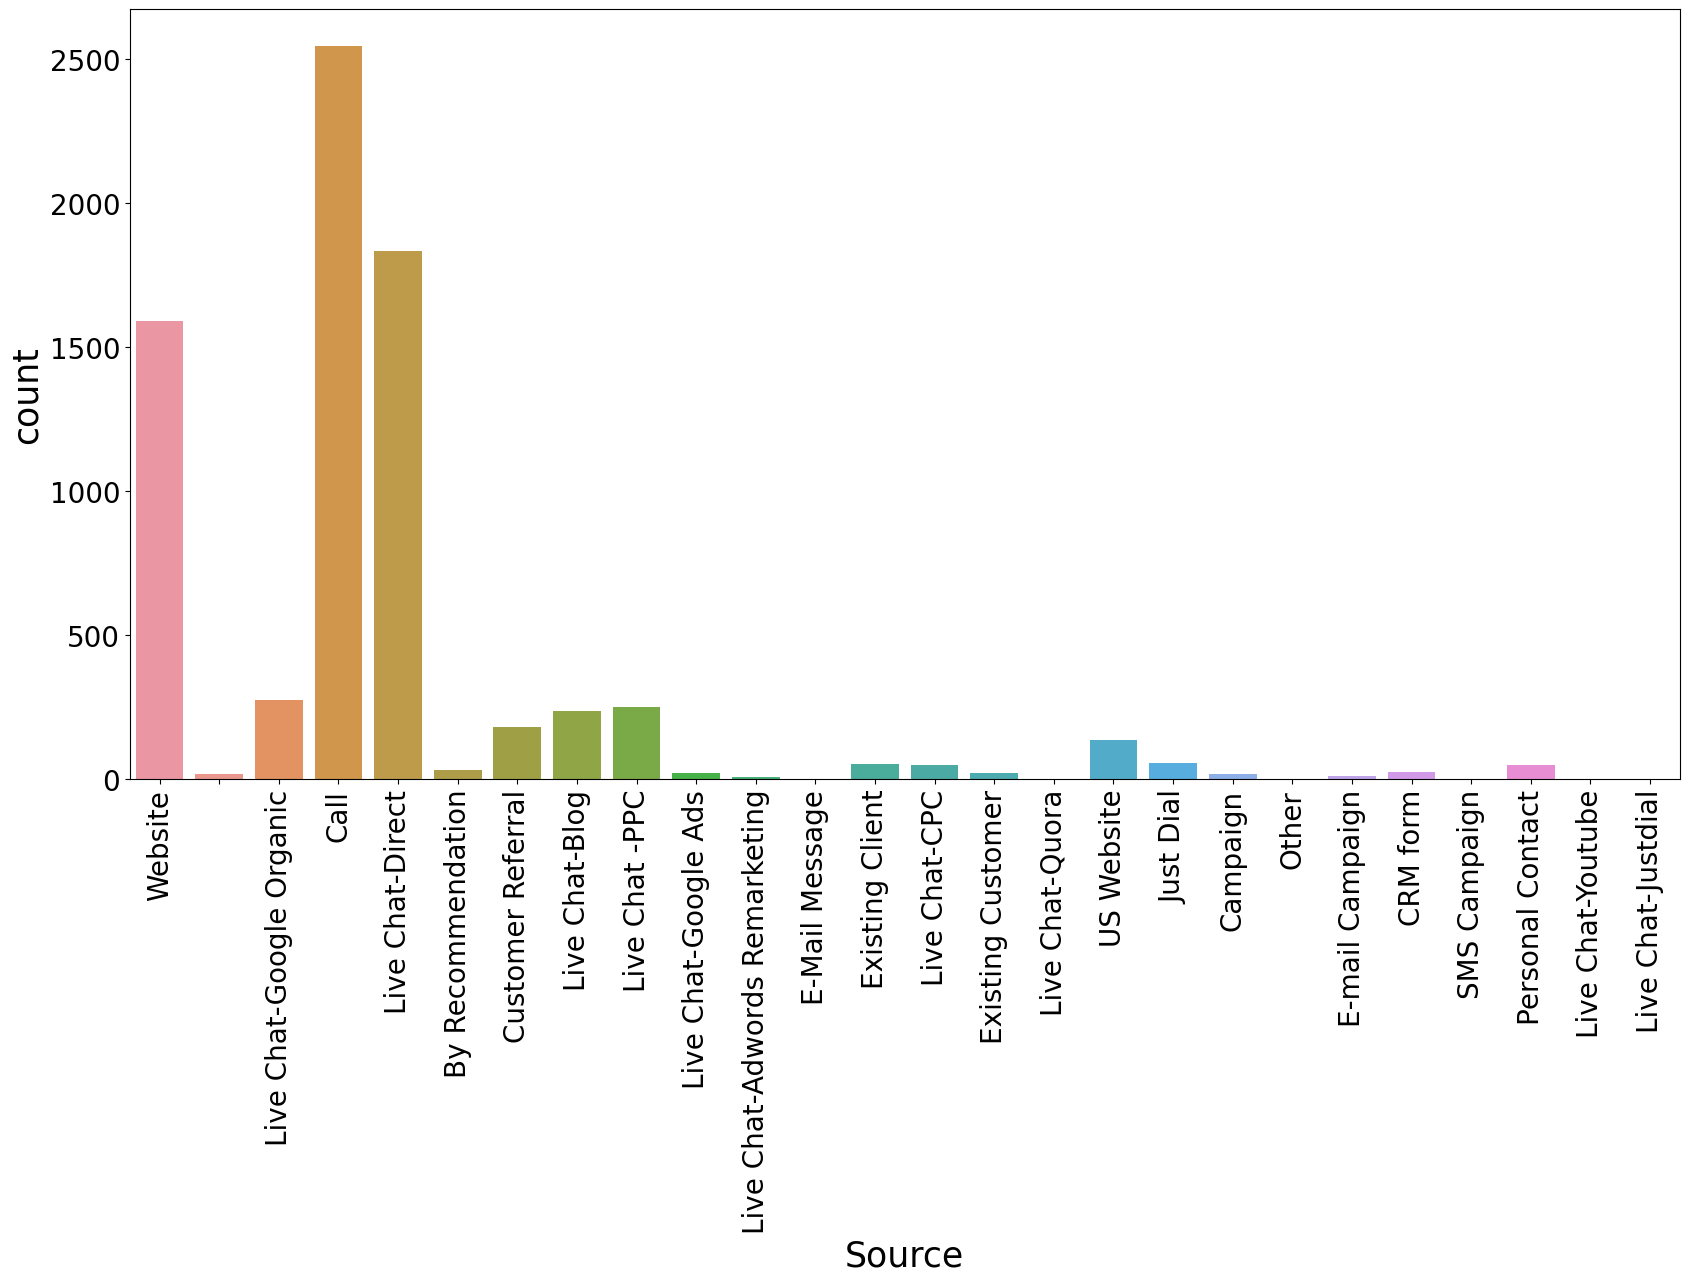

In [23]:
# Countplot for the column 'Source'
plt.figure(figsize=(20,10))
sns.countplot(data,x='Source')
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.xlabel('Source',fontsize=25)
plt.ylabel('count',fontsize=25)
plt.show()

###### Insights
The Source 'call' has count higher than the others

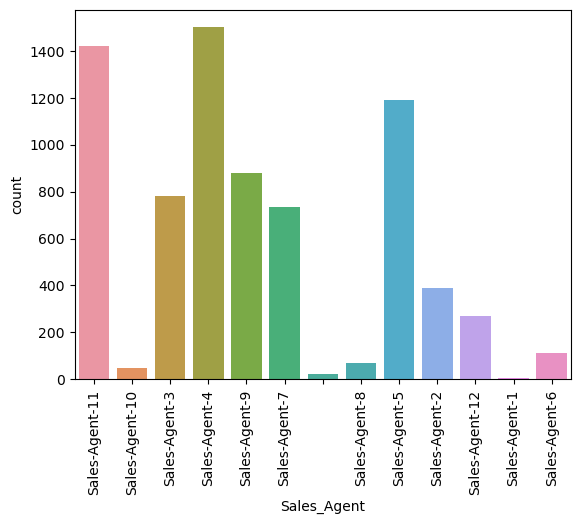

In [24]:
# Countplot for the column 'Sales_Agent'
sns.countplot(data,x='Sales_Agent')
plt.xticks(rotation=90)
plt.show()

###### Insights
The Sales Agent 4, 11 and 5 are the 1st, 2nd and 3rd highest count respectively

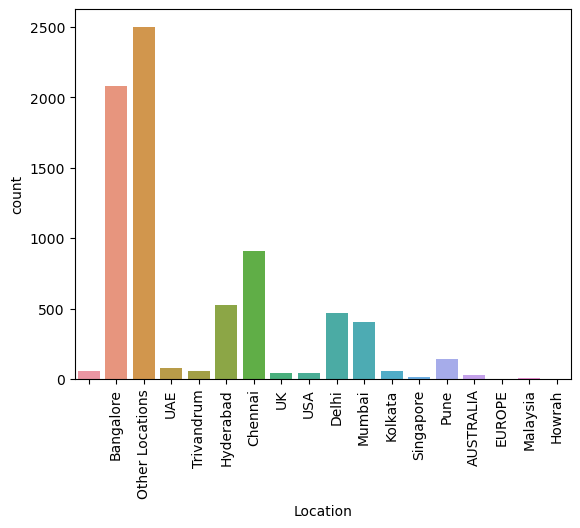

In [25]:
# Countplot for the column 'Location'
sns.countplot(data,x='Location')
plt.xticks(rotation=90)
plt.show()

###### Insights
The Location Bangalore has count higher than the others and the locations other than main cities are nearby 2500.

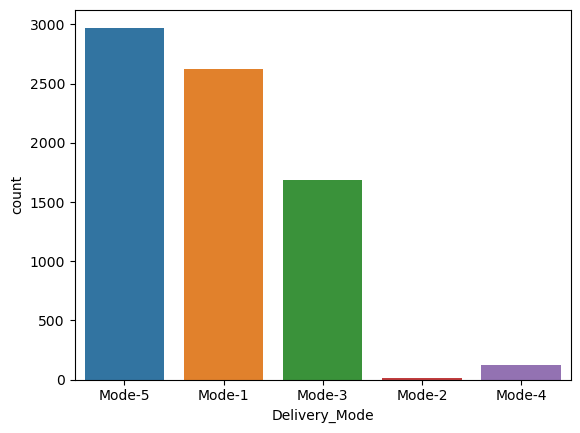

In [26]:
# Countplot for the column 'Delivery_Mode'
sns.countplot(data,x='Delivery_Mode')
plt.show()

###### Insights
The Delivery_Mode Mode-5 has high count and the Mode-2 has lower count.

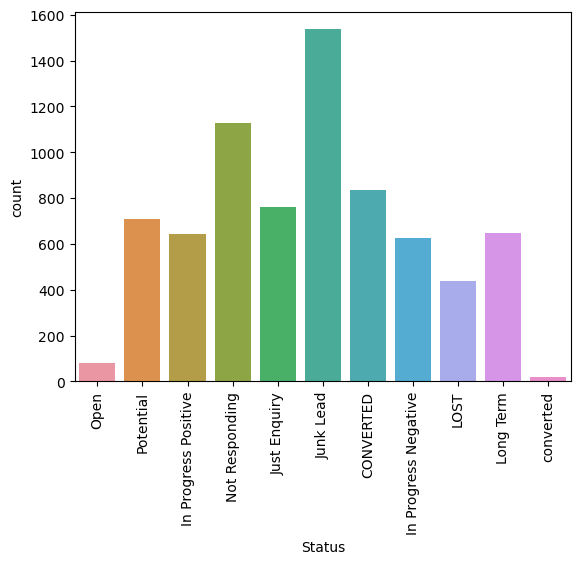

In [27]:
# Countplot for the column 'Status'
sns.countplot(data,x='Status')
plt.xticks(rotation=90)
plt.show()

Here, we will classify the unique values in the Status column into two classes(0:Low potential, 1:High potential)

In [97]:
# Checking value_counts for 'Status' column
data['Status'].value_counts()

Status
Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      80
converted                 18
Name: count, dtype: int64

In [98]:
# Creating dictionary for replacing 'Status' column
dictionary_Status={'Junk Lead':0,'Not Responding':0,'CONVERTED':1,'Just Enquiry':0,'Potential':1,'Long Term':1,'In Progress Positive':1,'In Progress Negative':0,'LOST':0,'Open':1,'converted':1}

In [99]:
# Replacing 'Status' column values
data['Status'].replace(dictionary_Status,inplace=True)

In [100]:
# Checking value_counts for the column 'Status'
data['Status'].value_counts()

Status
0    4491
1    2929
Name: count, dtype: int64

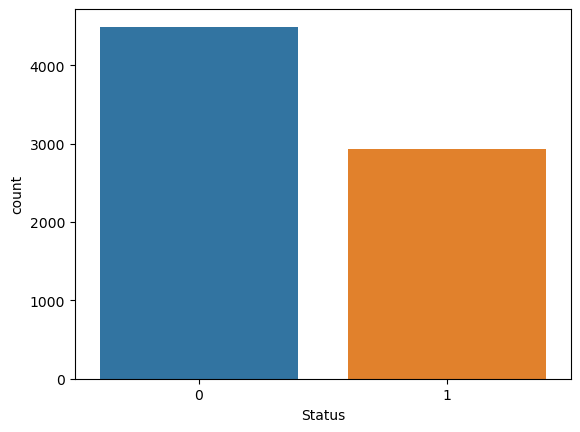

In [101]:
# Countplot for the column 'Status'
sns.countplot(data,x='Status')
plt.show()

### 6.2. Bivariate Analysis

In [33]:
# Grouping the data by 'Product_ID' and 'Status'
data.groupby(['Product_ID','Status']).size()

Product_ID  Status
            0            7
            1           49
0           0            2
1           0           85
            1           20
10          0           72
            1           96
11          0            8
            1            4
12          0           24
            1           12
13          0            4
            1            1
14          0           27
15          0         1420
            1           98
16          0            3
17          0            5
            1            2
18          0          874
            1          837
19          0          529
            1          660
2           0           24
            1           14
20          0           42
            1           60
21          0           35
            1           31
22          0            7
            1            1
23          0            2
24          0            2
            1            1
25          0           53
            1           37
26       

###### Insights
There are only five products which number of 1 in Status column is greater than number of 0 in Status column

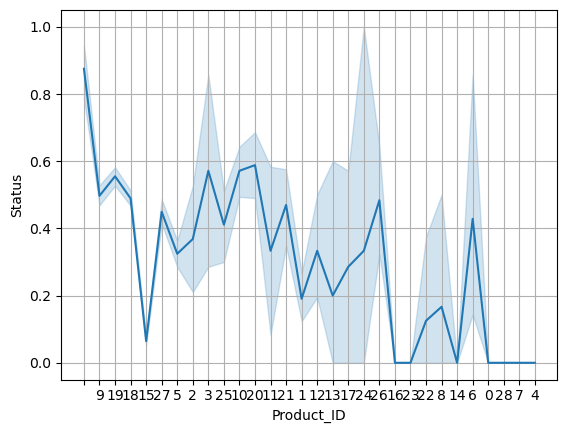

In [34]:
# Lineplot for 'Product_ID' and 'Status'
sns.lineplot(data,x='Product_ID',y='Status')
plt.grid(visible=True)

In [38]:
# Grouping the data by 'Source' and 'Status'
data.groupby(['Source','Status']).size()

Source                         Status
                               0            6
                               1           11
By Recommendation              0            3
                               1           29
CRM form                       0           16
                               1            7
Call                           0         1614
                               1          933
Campaign                       0           11
                               1            8
Customer Referral              0           19
                               1          161
E-Mail Message                 1            1
E-mail Campaign                0            7
                               1            5
Existing Client                0            3
                               1           48
Existing Customer              0            2
                               1           20
Just Dial                      0           42
                               1          

Insights:

There are only six Source which number of 1 in Status column is greater than number of 0 in Status column

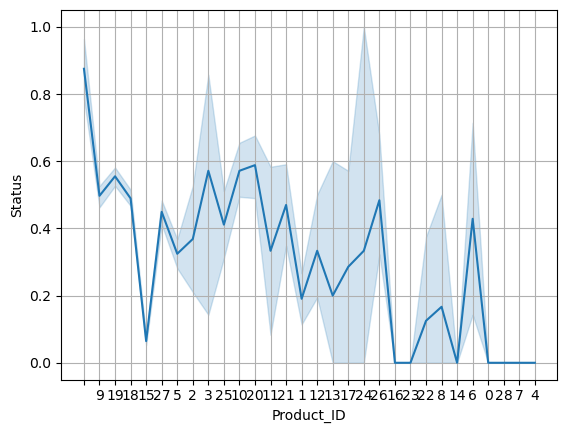

In [35]:
# Lineplot for 'Product_ID' and 'Status'
sns.lineplot(data,x='Product_ID',y='Status')
plt.grid(visible=True)

In [36]:
# Grouping the data by 'Source' and 'Status'
data.groupby(['Source','Status']).size()

Source                         Status
                               0            6
                               1           11
By Recommendation              0            3
                               1           29
CRM form                       0           16
                               1            7
Call                           0         1614
                               1          933
Campaign                       0           11
                               1            8
Customer Referral              0           19
                               1          161
E-Mail Message                 1            1
E-mail Campaign                0            7
                               1            5
Existing Client                0            3
                               1           48
Existing Customer              0            2
                               1           20
Just Dial                      0           42
                               1          

###### Insights
There are only six Source which number of 1 in Status column is greater than number of 0 in Status column

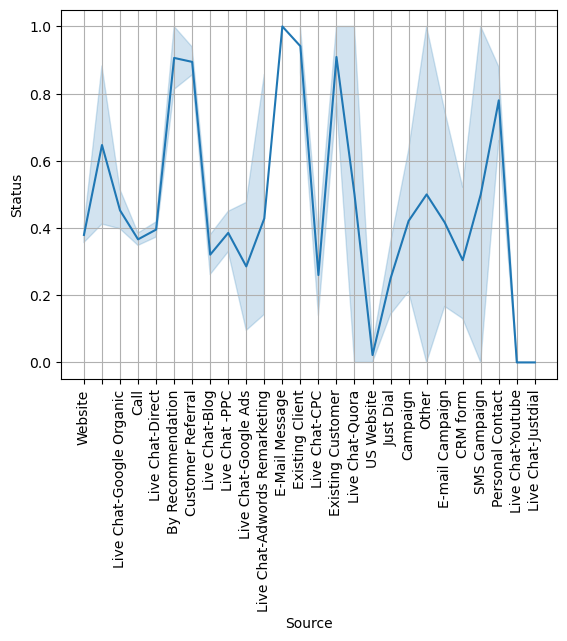

In [37]:
# Lineplot for 'Source' and 'Status'
sns.lineplot(data,x='Source',y='Status')
plt.xticks(rotation=90)
plt.grid(visible=True)

In [38]:
# Grouping the data by 'Sales_Agent' and 'Status'
data.groupby(['Sales_Agent','Status']).size()

Sales_Agent     Status
                0           7
                1          16
Sales-Agent-1   1           4
Sales-Agent-10  0           5
                1          42
Sales-Agent-11  0         923
                1         497
Sales-Agent-12  0         187
                1          82
Sales-Agent-2   0         216
                1         173
Sales-Agent-3   0         501
                1         280
Sales-Agent-4   0         953
                1         547
Sales-Agent-5   0         878
                1         312
Sales-Agent-6   0          54
                1          60
Sales-Agent-7   0         417
                1         319
Sales-Agent-8   0          29
                1          39
Sales-Agent-9   0         321
                1         558
dtype: int64

###### Insights
There are only six Sales Agents which number of 1 in Status column is greater than number of 0 in Status column

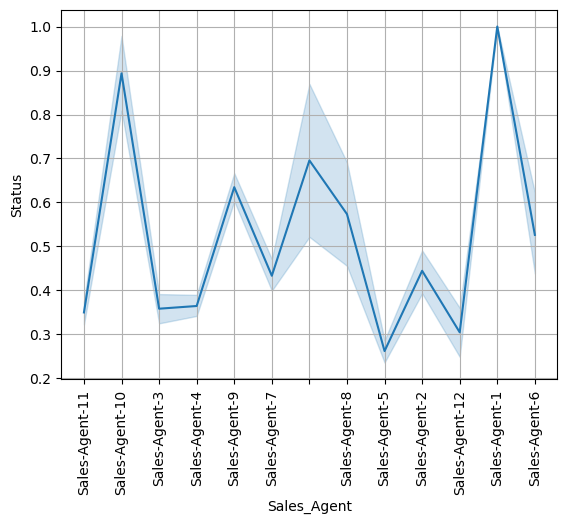

In [39]:
# Lineplot for 'Sales_Agent' and 'Status'
sns.lineplot(data,x='Sales_Agent',y='Status')
plt.xticks(rotation=90)
plt.grid(visible=True)

In [40]:
# Grouping the data by 'Location' and 'Status'
data.groupby(['Location','Status']).size()

Location         Status
                 0            8
                 1           48
AUSTRALIA        0           15
                 1           10
Bangalore        0          813
                 1         1271
Chennai          0          448
                 1          461
Delhi            0          306
                 1          165
EUROPE           1            3
Howrah           0            1
Hyderabad        0          322
                 1          206
Kolkata          0           42
                 1           13
Malaysia         1            4
Mumbai           0          260
                 1          142
Other Locations  0         2047
                 1          453
Pune             0           97
                 1           45
Singapore        0            8
                 1            9
Trivandrum       0           36
                 1           22
UAE              0           40
                 1           39
UK               0           21
                

###### Insights
There are only six Locations which number of 1 in Status column is greater than number of 0 in Status column

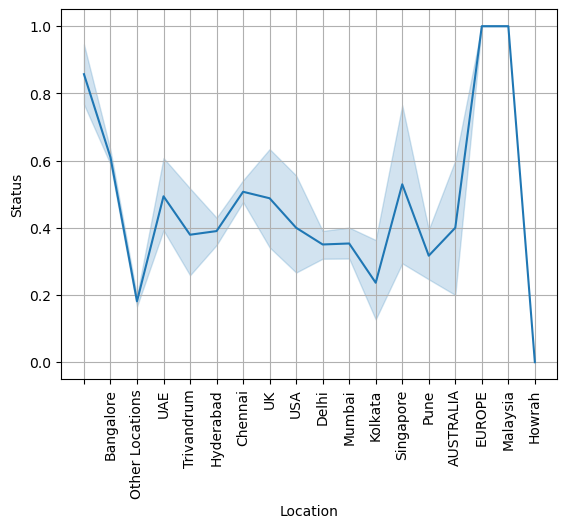

In [41]:
# Lineplot for 'Location' and 'Status'
sns.lineplot(data,x='Location',y='Status')
plt.xticks(rotation=90)
plt.grid(visible=True)

In [42]:
# Grouping the data by 'Delivery_Mode' and 'Status'
data.groupby(['Delivery_Mode','Status']).size()

Delivery_Mode  Status
Mode-1         0         1290
               1         1337
Mode-2         0            4
               1            7
Mode-3         0          985
               1          703
Mode-4         0           39
               1           82
Mode-5         0         2173
               1          800
dtype: int64

###### Insights
1. The delivery mode Mode-5 results in low potential for more than 70% of the orders
2. The delivey mode Mode-2 and mode-2 results in high potential of nearly 70% of the orders

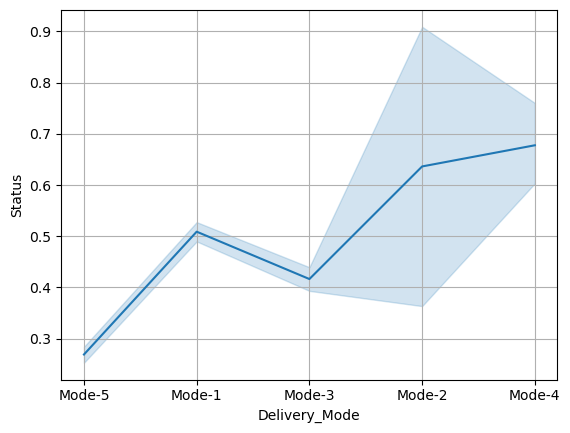

In [43]:
# Lineplot for 'Delivery_Mode' and 'Status'
sns.lineplot(data,x='Delivery_Mode',y='Status')
plt.grid(visible=True)

### 7. DATA PREPROCESSING

### 7.1. Null values handling

##### 7.1.1. Product_ID

In [102]:
# Checking value_counts in 'Product_ID'
data['Product_ID'].value_counts()

Product_ID
18.0    1711
15.0    1518
19.0    1189
9.0      992
27.0     739
5.0      487
10.0     168
1.0      105
20.0     102
25.0      90
21.0      66
2.0       38
12.0      36
26.0      31
14.0      27
11.0      12
22.0       8
3.0        7
17.0       7
6.0        7
8.0        6
13.0       5
24.0       3
16.0       3
23.0       2
0.0        2
28.0       1
7.0        1
4.0        1
Name: count, dtype: int64

In [103]:
 # Replace NaN values in 'Product_ID' column with the mode
data.loc[data['Product_ID'].isna(), 'Product_ID'] = data['Product_ID'].mode()[0]


In [104]:
#Checking product_ID have null values after handled

data.Product_ID.isnull().sum()

0

In [105]:
# Changing data type for 'Product_ID'
data['Product_ID']=data['Product_ID'].astype('int')

In [106]:
# Checking data type for 'Product_ID'
data['Product_ID'].dtype

dtype('int32')

##### 7.1.2. Source

In [107]:
# Checking value_counts for 'Source'
data['Source'].value_counts()

Source
Call                             2547
Live Chat-Direct                 1834
Website                          1592
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: count, dtype: int64

In [108]:
# # Replacing null value with mode
data.loc[data['Source'].isna(), 'Source'] = data['Source'].mode()[0]

In [109]:
data.Source.isnull().sum()

0

##### 7.1.3. Sales_Agent

In [110]:
# Checking value_counts for 'Sales_Agent'
data['Sales_Agent'].value_counts()

Sales_Agent
Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      47
Sales-Agent-1        4
Name: count, dtype: int64

In [111]:
# Replacing null value with mode
data.loc[data['Sales_Agent'].isna(), 'Sales_Agent'] = data['Sales_Agent'].mode()[0]

In [112]:
data.Sales_Agent.isnull().sum()

0

##### 7.1.4. Location

In [113]:
# Checking value_counts for 'Location'
data['Location'].value_counts()

Location
Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: count, dtype: int64

In [114]:
# Replacing null value with mode
data.loc[data['Location'].isna(), 'Location'] = data['Location'].mode()[0]

In [115]:
data.Location.isnull().sum()

0

### 7.2. Encoding 

##### 7.2.1. Source

In [116]:
# Initializing LabelEncoder
Source_labelencoder=LabelEncoder()

In [117]:
# Fitting and transforming 'Source' column to label encoder
data['Source']=Source_labelencoder.fit_transform(data['Source'])

##### 7.2.2. Sales_Agent

In [118]:
# Initializing LabelEncoder
Sales_Agent_labelencoder=LabelEncoder()

In [119]:
# Fitting and transforming 'Sales_Agent' column to label encoder
data['Sales_Agent']=Sales_Agent_labelencoder.fit_transform(data['Sales_Agent'])

##### 7.2.3. Location

In [120]:
# Initializing LabelEncoder
Location_labelencoder=LabelEncoder()

In [121]:
# Fitting and transforming 'Location' column to label encoder
data['Location']=Location_labelencoder.fit_transform(data['Location'])

##### 7.2.4. Delivery_Mode

In [122]:
# Initializing LabelEncoder
Delivery_Mode_labelencoder=LabelEncoder()

In [123]:
# Fitting and transforming 'Delivery_Mode' column to label encoder
data['Delivery_Mode']=Delivery_Mode_labelencoder.fit_transform(data['Delivery_Mode'])

### 7.3. Removing columns

1. The column 'Created' has 6752 unique values. So we will drop this column.
2. The column 'Mobile' has 1810 null values. So we can't handle these much null values. So we will drop this column.
3. The column 'EMAIL' has 1699 null values. So we can't handle these much null values. So we will drop this column.

In [125]:
# Dropping the columns 'Created','Mobile','EMAIL' permanently
data.drop(['Created','Mobile','EMAIL'],axis=1,inplace=True)

In [126]:
# Final preprocessed data for Model training
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,18,24,2,10,4,1
1,18,24,1,10,4,1
2,18,24,1,10,4,1
3,18,24,1,10,4,1
4,18,24,1,10,4,1
...,...,...,...,...,...,...
7415,9,2,8,9,3,0
7416,15,2,3,10,4,0
7417,5,14,2,1,0,0
7418,21,1,6,10,0,0


### 8. SPLITTING DATA

In [127]:
# Getting features from the data
X=data.drop('Status',axis=1)

# Getting target from the data
y=data['Status']

In [128]:
# Splitting training and testing data from the data
x_train,x_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=19)

# Initializing SMOTE
smote=SMOTE(random_state=7)

# Resampling the training data using SMOTE
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

### 9. MODEL TRAINING

#### 9.1. LOGISTIC REGRESSION

In [129]:
# Initializing LogisticRegression model
model=LogisticRegression()

# Fitting the training data to the Logistic Regression model
model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68       898
           1       0.54      0.66      0.59       586

    accuracy                           0.64      1484
   macro avg       0.64      0.64      0.64      1484
weighted avg       0.66      0.64      0.64      1484



In [130]:
# Evaluating the LogisticRegression model's performance by f1_score
print('The F1 score is ',f1_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The F1 score is  0.591743119266055


col_0,0,1
Status,,
0,563,335
1,199,387


#### 9.1.1. Hyperparameter tuning for Logistic Regression

In [55]:
# Initializing LogisticRegression model
model_ht=LogisticRegression()

# Creating a dictionary with possible Hyperparameters
params={'penalty' : ['l1', 'l2', 'elasticnet'],
        'fit_intercept':[True,False],
        'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'random_state': list(range(0,43))
       }

# Initializing GridSearchCV
logistic_cv=GridSearchCV(estimator=model_ht,
                        param_grid=params,
                        scoring='f1',
                        n_jobs=-1,
                        verbose=3)

# Fitting the training data to the GridSearchCV
logistic_cv.fit(x_train_smote,y_train_smote)


Fitting 5 folds for each of 1548 candidates, totalling 7740 fits


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='f1', verbose=3)

In [56]:
# Getting best hyperparameters
logistic_cv.best_params_ , logistic_cv.best_score_

({'fit_intercept': True,
  'penalty': 'l1',
  'random_state': 5,
  'solver': 'liblinear'},
 0.6690248543381063)

#### 9.1.2. Best LogisticRegression model

In [131]:
# Initializing LogisticRegression model
LogisticRegression_model=LogisticRegression(penalty='l1',fit_intercept=True,random_state=5,solver='liblinear')

# Fitting the training data to the Logistic Regression model
LogisticRegression_model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=LogisticRegression_model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68       898
           1       0.54      0.66      0.59       586

    accuracy                           0.64      1484
   macro avg       0.64      0.64      0.64      1484
weighted avg       0.66      0.64      0.64      1484



In [132]:
# Evaluating the LogisticRegression model's performance by f1_score
print('The F1 score is ',f1_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The F1 score is  0.591743119266055


col_0,0,1
Status,,
0,563,335
1,199,387


In [133]:
# F1 score for LogisticRegression model
LogisticRegression_f1_score=f1_score(y_test,y_pred)

#### 9.2. SUPPORT VECTOR MACHINE

In [134]:
# Initializing SVC model
model=SVC()

# Fitting the training data to the SVC model
model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       898
           1       0.55      0.67      0.61       586

    accuracy                           0.65      1484
   macro avg       0.65      0.66      0.65      1484
weighted avg       0.67      0.65      0.66      1484



In [135]:
# Evaluating the SVC model's performance by f1_score
print('The F1 score is ',f1_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The F1 score is  0.6055469953775039


col_0,0,1
Status,,
0,579,319
1,193,393


#### 9.2.1. Hyperparameter tuning for Support Vector Machine

In [62]:
# Initializing SVC model
model_ht=SVC()

# Creating a dictionary with possible Hyperparameters
params={'kernel' : ['linear', 'rbf', 'sigmoid'],
        'gamma' : ['scale', 'auto'],
        'random_state': [1,3,4,7,10,13,15,19]
       }

# Initializing GridSearchCV
svm_cv=GridSearchCV(estimator=model_ht,
                        param_grid=params,
                        scoring='f1',
                        n_jobs=-1,
                        verbose=3)

# Fitting the training data to the GridSearchCV
svm_cv.fit(x_train_smote,y_train_smote)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid'],
                         'random_state': [1, 3, 4, 7, 10, 13, 15, 19]},
             scoring='f1', verbose=3)

In [63]:
# Getting best hyperparameters
svm_cv.best_params_ , logistic_cv.best_score_

({'gamma': 'auto', 'kernel': 'rbf', 'random_state': 1}, 0.6690248543381063)

#### 9.2.2. Best SVC model

In [136]:
# Initializing SVC model
SVC_model=SVC(gamma='auto',kernel='rbf',random_state=1)

# Fitting the training data to the SVC model
SVC_model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=SVC_model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.67      0.71       898
           1       0.58      0.69      0.63       586

    accuracy                           0.68      1484
   macro avg       0.67      0.68      0.67      1484
weighted avg       0.69      0.68      0.68      1484



In [137]:
# Evaluating the SVC model's performance by f1_score
print('The F1 score is ',f1_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The F1 score is  0.6261682242990654


col_0,0,1
Status,,
0,602,296
1,184,402


In [138]:
# F1 score for SVC model
SVC_f1_score=f1_score(y_test,y_pred)

#### 9.3. DECISION TREE

In [139]:
# Initializing DecisionTreeClassifier model
model=DecisionTreeClassifier()

# Fitting the training data to the DecisionTreeClassifier model
model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       898
           1       0.60      0.63      0.61       586

    accuracy                           0.69      1484
   macro avg       0.67      0.68      0.67      1484
weighted avg       0.69      0.69      0.69      1484



In [140]:
# Evaluating the DecisionTreeClassifier model's performance by f1_score
print('The F1 score is ',f1_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The F1 score is  0.6137303556658396


col_0,0,1
Status,,
0,646,252
1,215,371


#### 9.3.1. Hyperparameter tuning for Decision Tree

In [71]:
# Initializing DecisionTreeClassifier model
model_ht=DecisionTreeClassifier()

# Creating a dictionary with possible Hyperparameters
params={'criterion' : ["gini",'entropy'],
        'splitter' : [ "random",'best'],
        'max_depth': [5,7,10,13,15,18,20],
        'min_samples_split':[5,7,10,13,15,18,20],
        'min_samples_leaf':[5,7,10,13,15,18,20],
        'random_state':[5,7,10,13,15,18,20]
       }

# Initializing RandomizedSearchCV
tree_cv=RandomizedSearchCV(estimator=model_ht,
                        param_distributions=params,
                        scoring='f1',
                        n_jobs=-1,
                        cv=5,
                        n_iter=10000,
                        verbose=3)

# Fitting the training data to the RandomizedSearchCV
tree_cv.fit(x_train_smote,y_train_smote)

Fitting 5 folds for each of 9604 candidates, totalling 48020 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=10000,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 7, 10, 13, 15, 18, 20],
                                        'min_samples_leaf': [5, 7, 10, 13, 15,
                                                             18, 20],
                                        'min_samples_split': [5, 7, 10, 13, 15,
                                                              18, 20],
                                        'random_state': [5, 7, 10, 13, 15, 18,
                                                         20],
                                        'splitter': ['random', 'best']},
                   scoring='f1', verbose=3)

In [72]:
# Getting best hyperparameters
tree_cv.best_params_, tree_cv.best_score_

({'splitter': 'best',
  'random_state': 15,
  'min_samples_split': 13,
  'min_samples_leaf': 5,
  'max_depth': 13,
  'criterion': 'entropy'},
 0.7261823007984434)

#### 9.3.2. Best DecisionTreeClassifier model

In [141]:
# Initializing DecisionTreeClassifier model
DecisionTreeClassifier_model=DecisionTreeClassifier(criterion='entropy',max_depth=13,min_samples_leaf=5,min_samples_split=13,splitter='best',random_state=15)

# Fitting the training data to the DecisionTreeClassifier model
DecisionTreeClassifier_model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=DecisionTreeClassifier_model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72       898
           1       0.58      0.65      0.61       586

    accuracy                           0.67      1484
   macro avg       0.66      0.67      0.66      1484
weighted avg       0.68      0.67      0.68      1484



In [142]:
# Evaluating the DecisionTreeClassifier model's performance by f1_score
print('The F1 score is ',f1_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The F1 score is  0.6093247588424437


col_0,0,1
Status,,
0,619,279
1,207,379


In [143]:
# F1 score for DecisionTreeClassifier model
DecisionTreeClassifier_f1_score=f1_score(y_test,y_pred)

#### 9.4. RANDOM FOREST

In [144]:
# Initializing RandomForestClassifier model
model=RandomForestClassifier(random_state=9)

# Fitting the training data to the RandomForestClassifier model
model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       898
           1       0.58      0.67      0.62       586

    accuracy                           0.68      1484
   macro avg       0.67      0.68      0.67      1484
weighted avg       0.69      0.68      0.68      1484



In [145]:
# Evaluating the RandomForestClassifier model's performance by f1_score
print('The F1 score is ',f1_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The F1 score is  0.6195393169181891


col_0,0,1
Status,,
0,615,283
1,196,390


#### 9.4.1. Hyperparameter tuning for Random Forest

In [78]:
# Initializing RandomForestClassifier model
model_ht=RandomForestClassifier(random_state=9)

# Creating a dictionary with possible Hyperparameters
params={'n_estimators':[100,200,300,400,500,1000,2000],
        'max_depth':[1,3,5,7,12,15,20],
        'min_samples_split':[1,3,5,7,12,15,20],
        'min_samples_leaf':[1,3,5,7,12,15,20],
        'random_state': [1,3,5,7,12,15,19]
       }

# Initializing RandomizedSearchCV
forest_cv=RandomizedSearchCV(estimator=model_ht,
                        param_distributions=params,
                        scoring='f1',
                        n_jobs=-1,
                        cv=5,
                        verbose=3,
                        n_iter=1000)

# Fitting the training data to the RandomizedSearchCV
forest_cv.fit(x_train_smote,y_train_smote)


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=9),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': [1, 3, 5, 7, 12, 15, 20],
                                        'min_samples_leaf': [1, 3, 5, 7, 12, 15,
                                                             20],
                                        'min_samples_split': [1, 3, 5, 7, 12,
                                                              15, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 1000, 2000],
                                        'random_state': [1, 3, 5, 7, 12, 15,
                                                         19]},
                   scoring='f1', verbose=3)

In [79]:
# Getting best hyperparameters
logistic_cv.best_params_ , logistic_cv.best_score_

({'fit_intercept': True,
  'penalty': 'l1',
  'random_state': 5,
  'solver': 'liblinear'},
 0.6690248543381063)

#### 9.1.2. Best LogisticRegression model

In [146]:
# Initializing LogisticRegression model
LogisticRegression_model=LogisticRegression(penalty='l1',fit_intercept=True,random_state=5,solver='liblinear')

# Fitting the training data to the Logistic Regression model
LogisticRegression_model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=LogisticRegression_model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68       898
           1       0.54      0.66      0.59       586

    accuracy                           0.64      1484
   macro avg       0.64      0.64      0.64      1484
weighted avg       0.66      0.64      0.64      1484



In [147]:
# Evaluating the LogisticRegression model's performance by f1_score
print('The F1 score is ',f1_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The F1 score is  0.591743119266055


col_0,0,1
Status,,
0,563,335
1,199,387


In [148]:
# F1 score for LogisticRegression model
RandomForestClassifier_f1_score=f1_score(y_test,y_pred)

#### 9.5. ARTIFICIAL NEURAL NETWORK

In [149]:
# Initializing MLPClassifier model
model=MLPClassifier()

# Fitting the training data to the MLPClassifier model
model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.51      0.63       898
           1       0.52      0.81      0.64       586

    accuracy                           0.63      1484
   macro avg       0.67      0.66      0.63      1484
weighted avg       0.70      0.63      0.63      1484



In [150]:
# Evaluating the MLPClassifier model's performance by f1_score
print('The F1 score is ',f1_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The F1 score is  0.6364242828552368


col_0,0,1
Status,,
0,462,436
1,109,477


#### 9.5.1. Hyperparameter tuning for Artificial Neural Network

In [85]:
# Initializing MLPClassifier model
model_ht=MLPClassifier()

# Creating a dictionary with possible Hyperparameters
params={'hidden_layer_sizes':[(100,),(200,),(300,),(400,),(500,),(1000,),(100,2),(200,2),(300,2),(400,2),(500,2),(1000,2)],
        'solver' : ['lbfgs', 'sgd', 'adam'],
        'learning_rate_init':[0.001,0.01,0.1,1],
        'random_state': [5,10,11,15,19]
       }

# Initializing RandomizedSearchCV
ann_cv=RandomizedSearchCV(estimator=model_ht,
                        param_distributions=params,
                        scoring='f1',
                        n_jobs=-1,
                        cv=5,
                        n_iter=100,
                        verbose=3)

# Fitting the training data to the RandomizedSearchCV
ann_cv.fit(x_train_smote,y_train_smote)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'hidden_layer_sizes': [(100,), (200,),
                                                               (300,), (400,),
                                                               (500,), (1000,),
                                                               (100, 2),
                                                               (200, 2),
                                                               (300, 2),
                                                               (400, 2),
                                                               (500, 2),
                                                               (1000, 2)],
                                        'learning_rate_init': [0.001, 0.01, 0.1,
                                                               1],
                                        'random_state': [5, 10, 11, 15, 19],
                                        'solver': ['lbfgs', 'sgd', 'adam']},
                   scoring='f1', verbose=3)

In [86]:
# Getting best hyperparameters
ann_cv.best_params_, ann_cv.best_score_

({'solver': 'adam',
  'random_state': 11,
  'learning_rate_init': 0.001,
  'hidden_layer_sizes': (1000,)},
 0.7198283449395407)

#### 9.5.2. Best MLPClassifier model

In [151]:
# Initializing MLPClassifier model
MLPClassifier_model=MLPClassifier(hidden_layer_sizes=(1000,),learning_rate_init=0.001,solver='adam',random_state=11)

# Fitting the training data to the MLPClassifier model
MLPClassifier_model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=MLPClassifier_model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.59      0.67       898
           1       0.54      0.74      0.62       586

    accuracy                           0.65      1484
   macro avg       0.66      0.66      0.65      1484
weighted avg       0.68      0.65      0.65      1484



In [152]:
# Evaluating the MLPClassifier model's performance by f1_score
print('The F1 score is ',f1_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The F1 score is  0.6239193083573487


col_0,0,1
Status,,
0,529,369
1,153,433


In [153]:
# F1 score for MLPClassifier model
MLPClassifier_f1_score=f1_score(y_test,y_pred)

#### 9.6. K NEIGHBORS CLASSIFIER

In [154]:
# Initializing KNeighborsClassifier model
model=KNeighborsClassifier()

# Fitting the training data to the KNeighborsClassifier model
model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       898
           1       0.59      0.64      0.61       586

    accuracy                           0.68      1484
   macro avg       0.67      0.67      0.67      1484
weighted avg       0.69      0.68      0.68      1484



In [155]:
# Evaluating the KNeighborsClassifier model's performance by f1_score
print('The F1 score is ',f1_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The F1 score is  0.6145069274653626


col_0,0,1
Status,,
0,634,264
1,209,377


#### 9.6.1. Hyperparameter tuning for KNeighborsClassifier

In [92]:
# Initializing KNeighborsClassifier model
model_ht=KNeighborsClassifier()

# Creating a dictionary with possible Hyperparameters
params={'n_neighbors' : [1,2,3,4,5],
        'weights':['uniform', 'distance']
       }

# Initializing GridSearchCV
KNN_cv=GridSearchCV(estimator=model_ht,
                        param_grid=params,
                        scoring='f1',
                        n_jobs=-1,
                        cv=5,
                        verbose=3)

# Fitting the training data to the GridSearchCV
KNN_cv.fit(x_train_smote,y_train_smote) 


Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=3)

In [93]:
# Getting best hyperparameters
KNN_cv.best_params_,KNN_cv.best_score_

({'n_neighbors': 5, 'weights': 'uniform'}, 0.7009146797020074)

#### 9.6.2. Best KNeighborsClassifier model

In [156]:
# Initializing KNeighborsClassifier model
KNeighborsClassifier_model=KNeighborsClassifier(n_neighbors=5,weights='uniform')

# Fitting the training data to the KNeighborsClassifier model
KNeighborsClassifier_model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=KNeighborsClassifier_model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       898
           1       0.59      0.64      0.61       586

    accuracy                           0.68      1484
   macro avg       0.67      0.67      0.67      1484
weighted avg       0.69      0.68      0.68      1484



In [157]:
# Evaluating the KNeighborsClassifier model's performance by f1_score
print('The F1 score is ',f1_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The F1 score is  0.6145069274653626


col_0,0,1
Status,,
0,634,264
1,209,377


In [158]:
# F1 score for KNeighborsClassifier model
KNeighborsClassifier_f1_score=f1_score(y_test,y_pred)

### 10. MODEL COMPARISON REPORT

In [159]:
# Creating a dictionary for the model and their corresponding f1_score 
comparison_dict={'Model':['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','MLPClassifier'],
                    'F1_score':[LogisticRegression_f1_score,KNeighborsClassifier_f1_score,SVC_f1_score,DecisionTreeClassifier_f1_score,RandomForestClassifier_f1_score,MLPClassifier_f1_score]
                }

# Creating dataframe 
comparison_df=pd.DataFrame(comparison_dict)

# Sorting the dataframe by the f1_score column in descending order
comparison_df=comparison_df.sort_values(by='F1_score', ascending=False)

# Setting the index as the model column
comparison_df=comparison_df.set_index('Model')

# Visualizing the dataframe
print('The DataFrame showing performance of different models:')
print("")
print(comparison_df)

The DataFrame showing performance of different models:

                        F1_score
Model                           
SVC                     0.626168
MLPClassifier           0.623919
KNeighborsClassifier    0.614507
DecisionTreeClassifier  0.609325
LogisticRegression      0.591743
RandomForestClassifier  0.591743


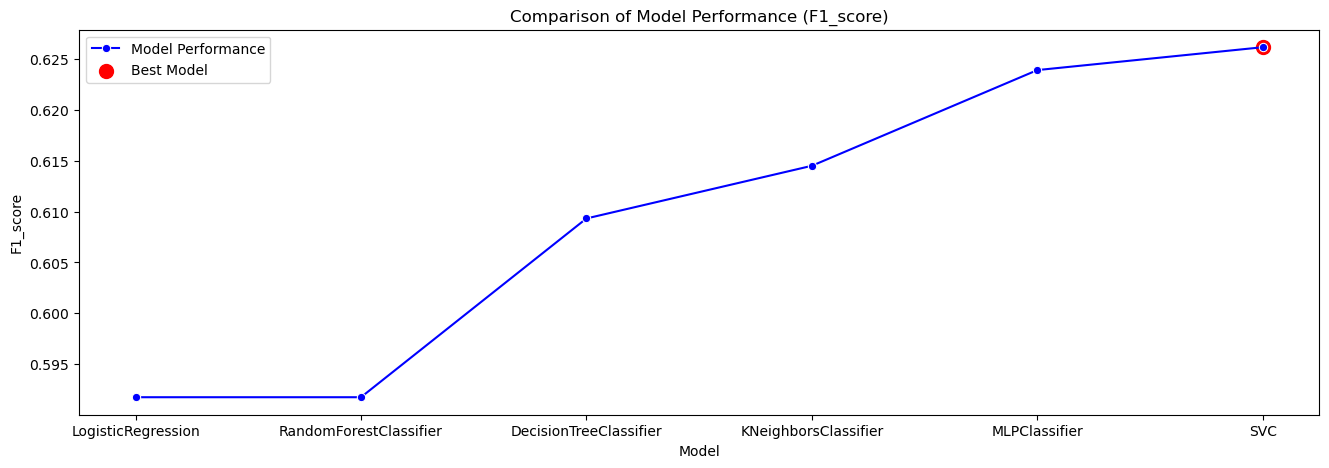

In [160]:
# Creating a dictionary for the model and their corresponding f1_score 
comparison_dict={'Model':['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','MLPClassifier'],
                    'F1_score':[LogisticRegression_f1_score,KNeighborsClassifier_f1_score,SVC_f1_score,DecisionTreeClassifier_f1_score,RandomForestClassifier_f1_score,MLPClassifier_f1_score]
                }

# Creating dataframe 
comparison_df=pd.DataFrame(comparison_dict)

# Visualization
comparison_df = comparison_df.sort_values(by='F1_score', ascending=True)

max_index = comparison_df['F1_score'].idxmax()  # This returns the row index having highest accuracy_score

plt.figure(figsize=(16, 5))
sns.lineplot(data=comparison_df, x='Model', y='F1_score', marker='o', color='blue', label="Model Performance")

plt.scatter(comparison_df.loc[max_index, 'Model'], comparison_df.loc[max_index, 'F1_score'],color='red', s=100, label="Best Model")

plt.xlabel("Model")
plt.ylabel("F1_score")
plt.legend()
plt.title("Comparison of Model Performance (F1_score)")
plt.show() 

1.In this project aimed at improving sales effectiveness by predicting lead quality (High Potential vs Low Potential), multiple machine learning models were evaluated based on their F1 Score.

2.SVC (Support Vector Classifier) performed the best with an F1 score of 0.626, indicating a balanced ability to correctly classify both high and low potential leads.

3.MLPClassifier and KNeighborsClassifier also demonstrated competitive performance, closely following SVC.

4.Simpler models like Logistic Regression and Decision Trees underperformed compared to more complex models.

#  11. Report on challenges faced

1.All features in the dataset are categorical or discrete in nature, which adds a layer of complexity to the modelling process.

2.Establishing a clear relationship between the features and the target variable is challenging, given the lack of continuous or strongly correlated variables.

3.There appears to be no direct or deterministic association between the input features and the target, making the prediction task somewhat like finding a needle in a haystack.

4.Even after performing hyperparameter tuning, only marginal improvement in model performance was observed, indicating that the model's learning capacity is inherently limited by the nature of the data

##### Project Details:

###### Project Team ID: 
PTID-CDS-JAN-25-2367

###### Project ID:     
PR-0019
###### Team Members:    
    1.RAJESH KANNAN - rajeshkannanemailpdkt@gmail.com
    2.THIRUMALAI  -thiru292004@gmail.com
    3.SABARISHAN  -sabarishan342002@gmail.com
    4.VIMAL RAJ J - mrvimalofficiall@gmail.com
